### Plot and analyzes the **monitor's frequency stability** using the processed data

In [1]:
# Import library
import functions.process_freq as func
import pandas as pd
import os

In [6]:
### Configuration
# ===Experiment config===
n_trial = 64    
n_block = 18
# =======================

### Configuration
# Please change monitor frequency same as monitor refresh rate
# monitor_frequency = 60      # Acer 60hz test monitor
monitor_frequency = 120     # NX monitor 

sr = 500    # Photocell Sampling rate
threshold = 125     # Photocell threshold

In [7]:
# Subject ID
subject = 2001

process_path = 'process_data'
subject_path = f's{subject}'

In [8]:
error_trial = []
for i in range(1,n_block+1):
    # Load Data
    filename = f's{subject}_block_{i}_process.csv'
    filename = os.path.join(process_path,subject_path, filename)
    try:
        df = pd.read_csv(filename)
        df = func.preprocess_ldr(df)
        print(f"=====block_{i}=====")
        
        # Check missing marker
        func.check_missing_marker(df, total_trials=n_trial)  
        
        # Find average frequency each trial 
        trial_labels, freqs = func.collect_frequencies(df,num_trial=n_trial, monitor_freq=monitor_frequency, sr=sr,threshold=threshold)

        # Plot overall freq check
        error_trial.append(func.plot_all_frequency_and_ldr(df, block_num=i, n_trial=n_trial, frequencies=freqs, trial_labels=trial_labels, plot=False))
        
    except FileNotFoundError:
        print(f"Block {i} file note found")

=====block_1=====
All markers present.
Not in range of SD +- 1:  [10, 19, 20, 32]
Outlier No.:  4
=====block_2=====
All markers present.
Not in range of SD +- 1:  [4, 11, 12, 14]
Outlier No.:  4
Block 3 file note found
=====block_4=====
All markers present.
Not in range of SD +- 1:  [2, 8, 10, 12]
Outlier No.:  4
Block 5 file note found
=====block_6=====
All markers present.
Not in range of SD +- 1:  [11, 14, 16]
Outlier No.:  3
=====block_7=====
All markers present.
Not in range of SD +- 1:  [1, 2, 23]
Outlier No.:  3
=====block_8=====
All markers present.
Not in range of SD +- 1:  [4, 6, 13, 16]
Outlier No.:  4
=====block_9=====
All markers present.
Not in range of SD +- 1:  [4, 7, 17, 22]
Outlier No.:  4
Block 10 file note found
=====block_11=====
All markers present.
Not in range of SD +- 1:  [4, 5, 7, 15]
Outlier No.:  4
=====block_12=====
All markers present.
Not in range of SD +- 1:  [2, 18]
Outlier No.:  2
=====block_13=====
All markers present.
Not in range of SD +- 1:  [4, 8,

In [9]:
cnt = 0
block_len = len(error_trial)
for i in range(block_len):
    temp = len(error_trial[i])
    print(f"Block_{i} out of SD:", temp)
    cnt += temp
print("Percent Error: ", cnt/(block_len*n_trial))

Block_0 out of SD: 4
Block_1 out of SD: 4
Block_2 out of SD: 4
Block_3 out of SD: 3
Block_4 out of SD: 3
Block_5 out of SD: 4
Block_6 out of SD: 4
Block_7 out of SD: 4
Block_8 out of SD: 2
Block_9 out of SD: 4
Block_10 out of SD: 5
Block_11 out of SD: 4
Percent Error:  0.05859375


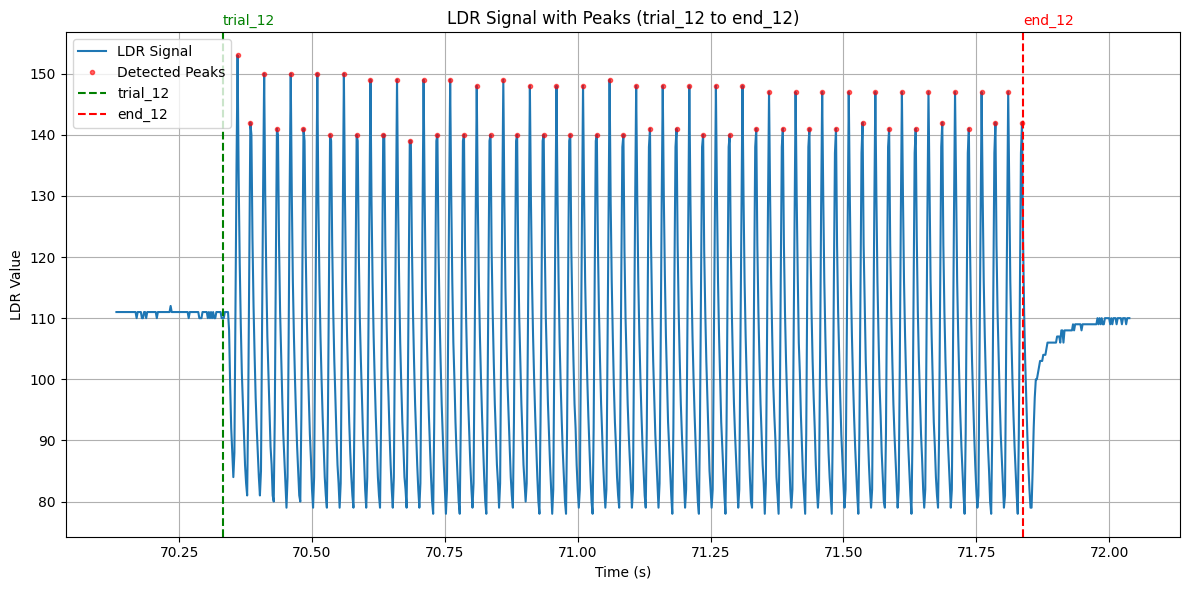

Frequency: 39.9729 Hz, Peaks: 60, Est. Period: 0.0250 sec


In [49]:
# Plot specific Block-Trial
block_id = 7
trial_num = 12

try:
    filename = f's{subject}_block_{block_id}_process.csv'
    filename = os.path.join(process_path,subject_path, filename)
    df = pd.read_csv(filename)
    df = func.preprocess_ldr(df)

    func.plot_peaks_in_trial(df, f'trial_{trial_num}', f'end_{trial_num}', distance=5, height=threshold)
        
    # For specific plot 
    # func.plot_ldr_data_with_markers(df=df)  # plot all photocell_value-marker
    # func.plot_frequency_stability(trial_labels, freqs)
    # func.plot_hist_freq(freqs=freqs)
except FileNotFoundError:
    print(f"File Block: {block_id}, trial: {trial_num} Not found")

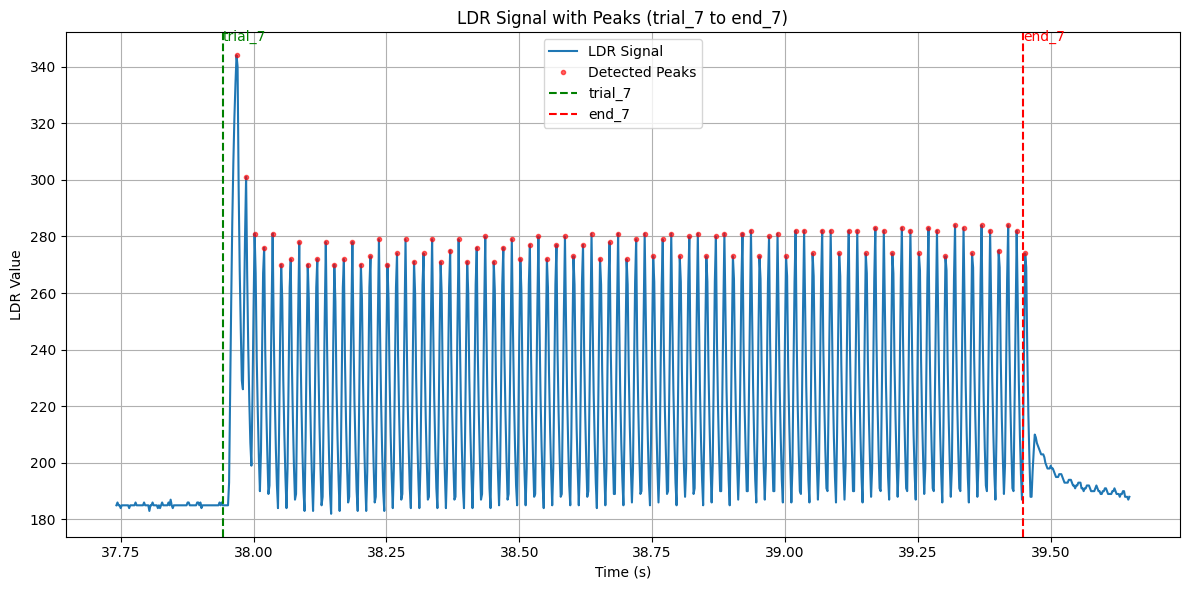

Frequency: 59.9730 Hz, Peaks: 90, Est. Period: 0.0167 sec


In [7]:
# Plot specific Block-Trial
block_id = 2
trial_num = 7

try:
    filename = f's{subject}_block_{block_id}_process.csv'
    filename = os.path.join(process_path,subject_path, filename)
    df = pd.read_csv(filename)
    df = func.preprocess_ldr(df)

    func.plot_peaks_in_trial(df, f'trial_{trial_num}', f'end_{trial_num}', distance=7, height=threshold)
        
    # For specific plot 
    # func.plot_ldr_data_with_markers(df=df)  # plot all photocell_value-marker
    # func.plot_frequency_stability(trial_labels, freqs)
    # func.plot_hist_freq(freqs=freqs)
except FileNotFoundError:
    print(f"File Block: {block_id}, trial: {trial_num} Not found")

All markers present.


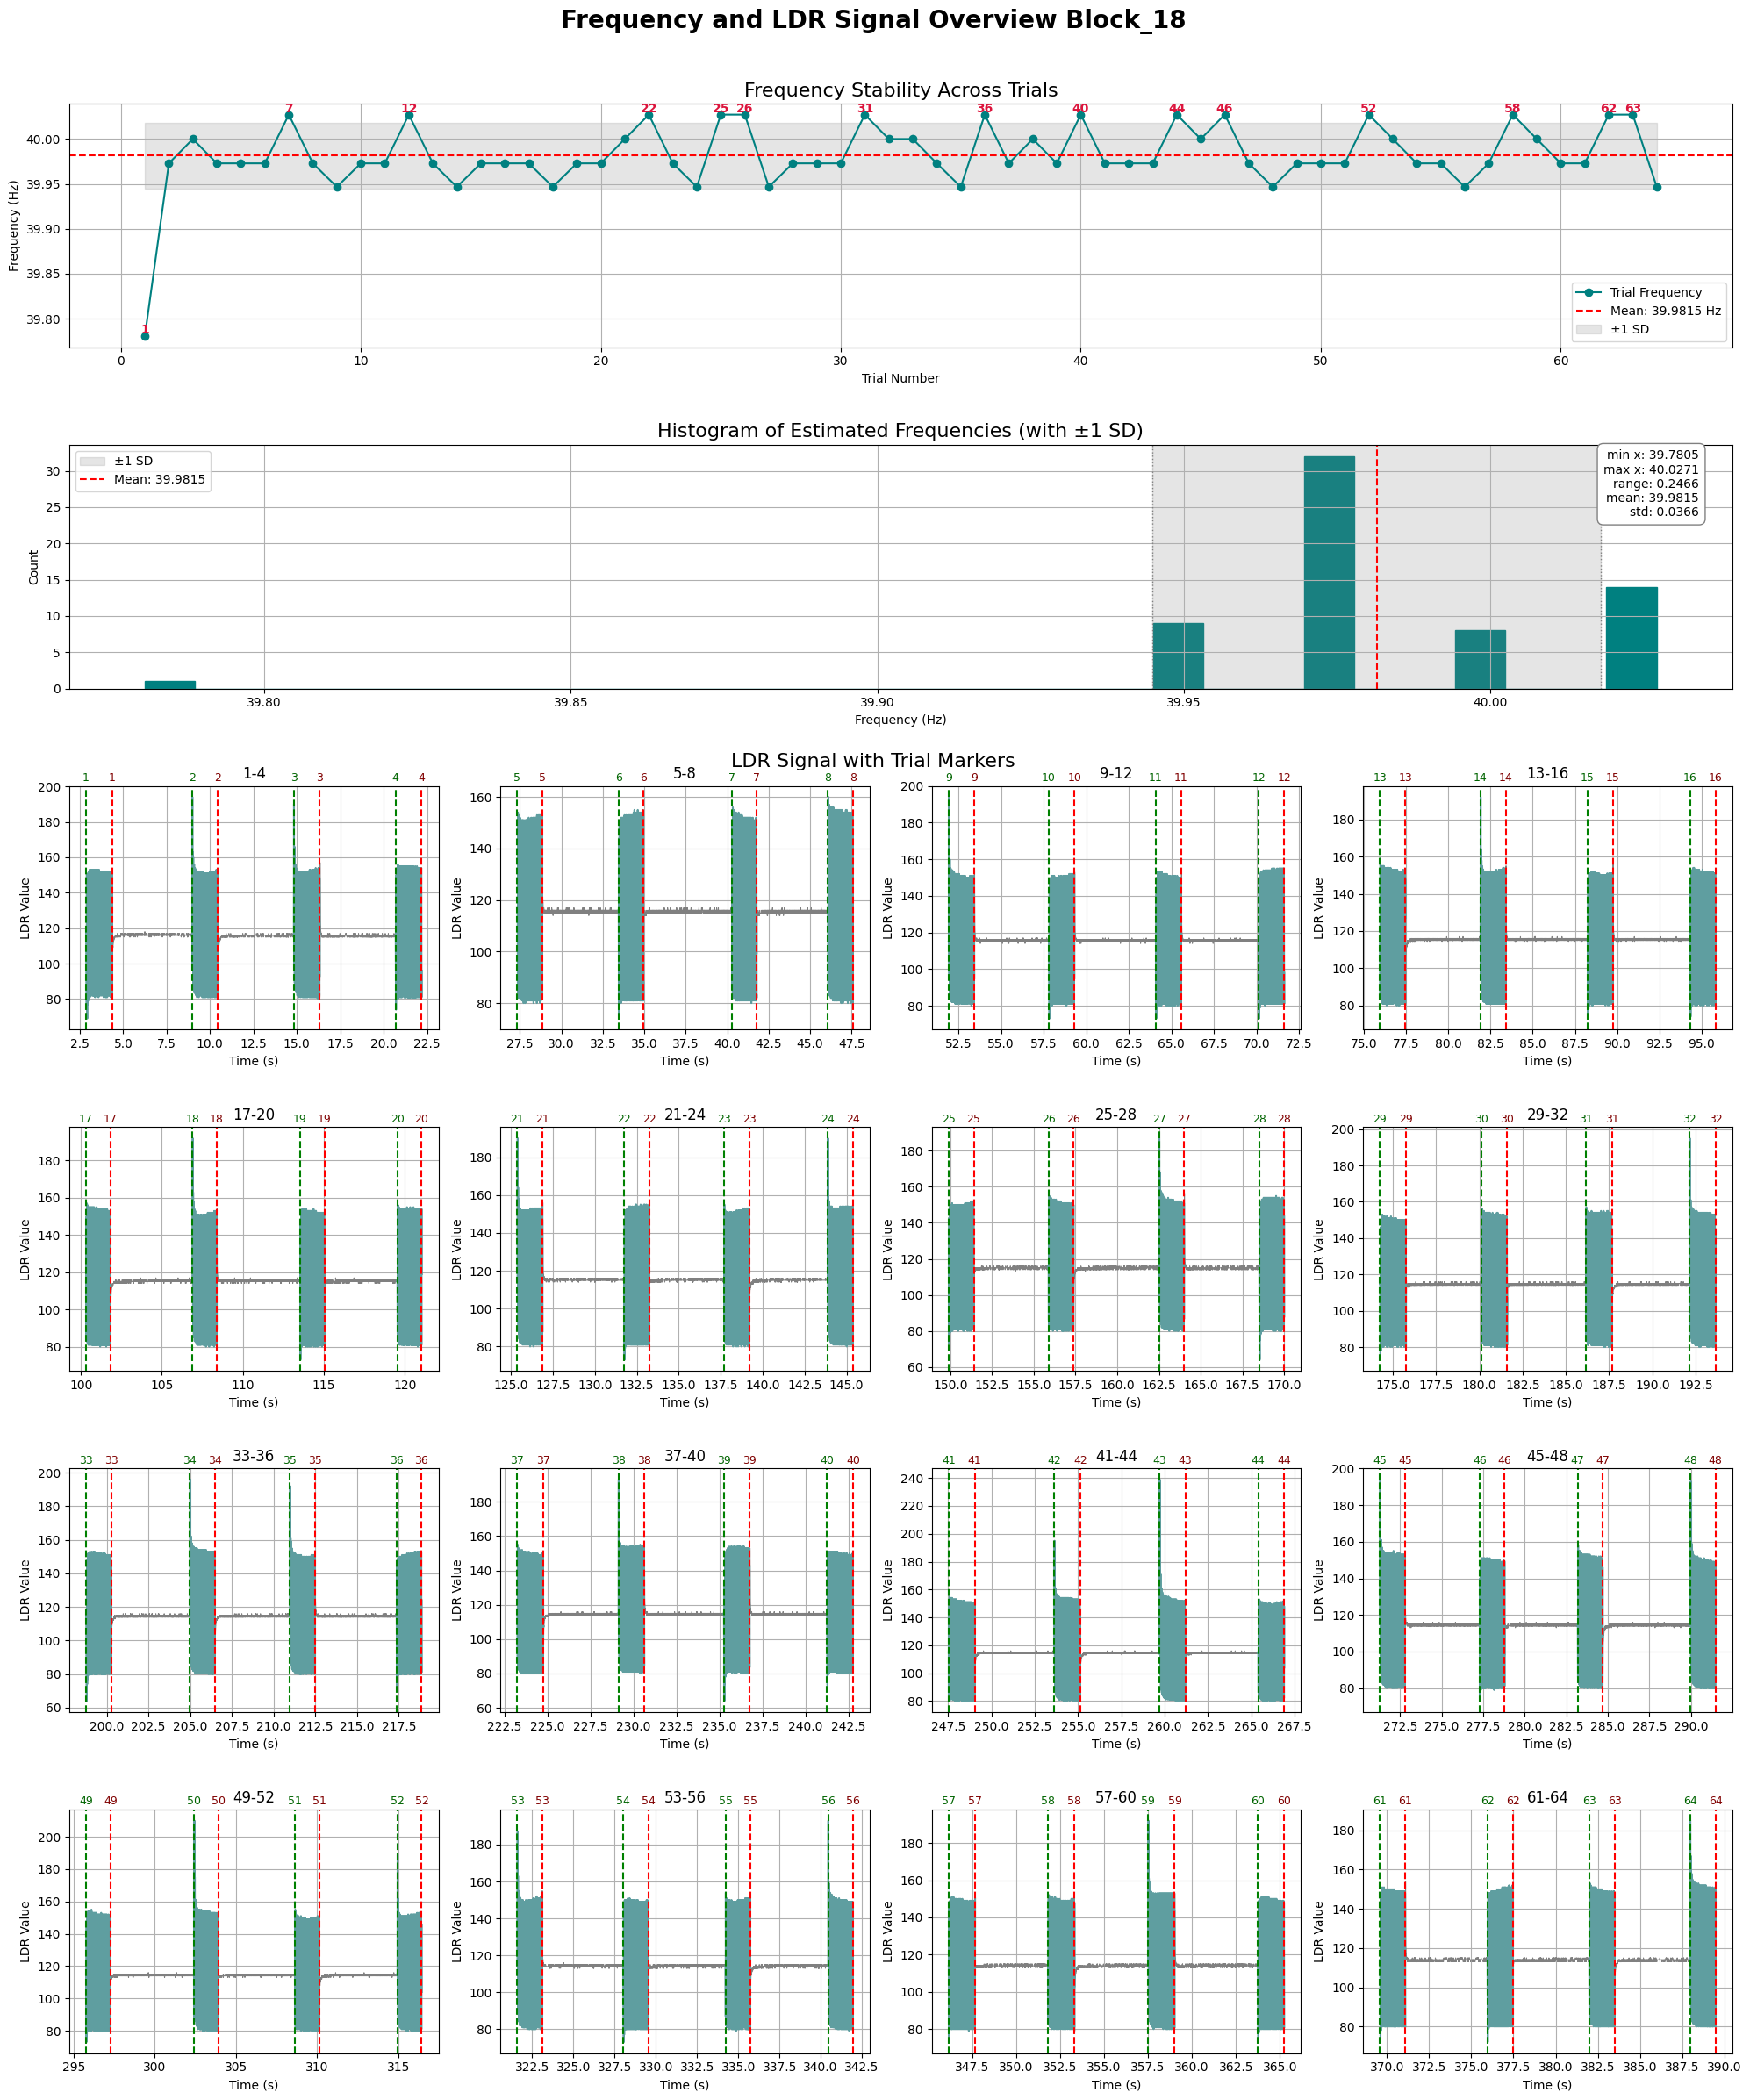

In [37]:
func.check_missing_marker(df, total_trials=n_trial)  
threshold = 130
# Find average frequency each trial 
trial_labels, freqs = func.collect_frequencies(df,num_trial=n_trial, monitor_freq=monitor_frequency, sr=sr,threshold=threshold)
# print((freqs))
# Plot overall freq check
func.plot_all_frequency_and_ldr(df, block_num=i, n_trial=n_trial, frequencies=freqs, trial_labels=trial_labels)
        